<a href="https://colab.research.google.com/github/einsteinxaepie/Machine-learning-projects-series/blob/main/Wearing_a_mask_or_not_prediction_machine_learning(CNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/archive.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [2]:
#Importing dependencies
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [3]:
with_mask_files=os.listdir("/content/data/with_mask")
#Checking first 5 with mask
print(with_mask_files[0:5])
#Checking last 5 with mask
print(with_mask_files[-5:])

['with_mask_2054.jpg', 'with_mask_2073.jpg', 'with_mask_2287.jpg', 'with_mask_1174.jpg', 'with_mask_117.jpg']
['with_mask_2675.jpg', 'with_mask_997.jpg', 'with_mask_615.jpg', 'with_mask_2365.jpg', 'with_mask_3689.jpg']


In [4]:
without_mask_files=os.listdir("/content/data/without_mask")
#Checking first 5 without mask
print(without_mask_files[0:5])
#Checking last 5 without mask
print(without_mask_files[-5:])

['without_mask_930.jpg', 'without_mask_555.jpg', 'without_mask_3169.jpg', 'without_mask_7.jpg', 'without_mask_3742.jpg']
['without_mask_1149.jpg', 'without_mask_2410.jpg', 'without_mask_1359.jpg', 'without_mask_2694.jpg', 'without_mask_1198.jpg']


In [5]:
#Checking numbers of each
with_mask_files=os.listdir("/content/data/with_mask")
print("Total with mask is ", len(with_mask_files))
without_mask_files=os.listdir("/content/data/without_mask")
print("Total without mask is ", len(without_mask_files))

Total with mask is  3725
Total without mask is  3828


In [6]:
#Creating labels for each, 1 with and 0 without mask
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

Checking labels

In [7]:
#With mask
print(with_mask_labels[0:5])

[1, 1, 1, 1, 1]


In [8]:
#Without mask
print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]


In [9]:
#Combine the labels
Labels=with_mask_labels+without_mask_labels
print(Labels[0:5])
print(Labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Checking sizes of random images

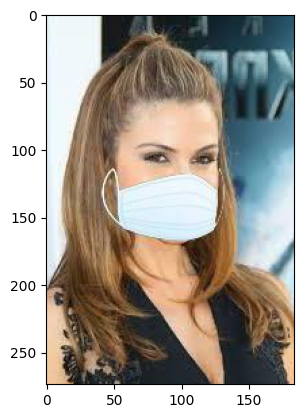

In [10]:
#With mask
img=mpimg.imread("/content/data/with_mask/with_mask_2054.jpg")
imgplot=plt.imshow(img)
plt.show()

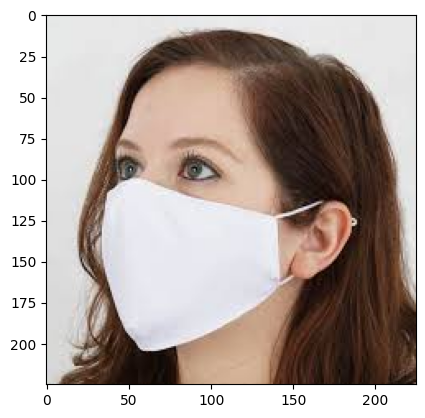

In [11]:
#With mask
img=mpimg.imread("/content/data/with_mask/with_mask_2365.jpg")
imgplot=plt.imshow(img)
plt.show()

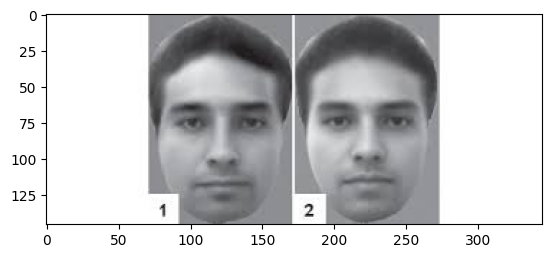

In [12]:
#Without mask
img=mpimg.imread("/content/data/without_mask/without_mask_2410.jpg")
imgplot=plt.imshow(img)
plt.show()

Image resizing

In [13]:
with_mask_path="/content/data/with_mask/"
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert("RGB")
  image=np.array(image)
  data.append(image)

without_mask_path="/content/data/without_mask/"

for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert("RGB")
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
#Checking length and datatype of "data"
print(type(data))
print(len(data))

<class 'list'>
7553


In [15]:
X=np.asarray(data)
Y=np.asarray(Labels)

print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
#Splitting the dataset
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [17]:
#Scaling the X_train and X_test data
X_train=X_train/255
X_test=X_test/255

#print(X_train_scaled[0:2])

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [19]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary classification: mask (1) vs no mask (0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#Compiling the neural network
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
#Training the model
model.fit(X_train, Y_train,
          validation_data=(X_test, Y_test),
          epochs=10,
          batch_size=32)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.7684 - loss: 0.4602 - val_accuracy: 0.9007 - val_loss: 0.2848
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.9102 - loss: 0.2316 - val_accuracy: 0.9173 - val_loss: 0.2020
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9373 - loss: 0.1682 - val_accuracy: 0.9371 - val_loss: 0.1830
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9513 - loss: 0.1225 - val_accuracy: 0.9385 - val_loss: 0.1839
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9707 - loss: 0.0846 - val_accuracy: 0.9418 - val_loss: 0.1667
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9844 - loss: 0.0519 - val_accuracy: 0.9444 - val_loss: 0.1608
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9830 - loss: 0.0455 - val_accuracy: 0.9583 - val_loss: 0.1720
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.9908 - loss: 0.0283 - val_accu

Evaluating the model

In [22]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - accuracy: 0.9553 - loss: 0.2354
Test Loss: 0.24823810160160065
Test Accuracy: 0.9516876339912415


In [23]:
predictions = model.predict(X_test)
predicted_classes = np.round(predictions).astype(int)

48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 347ms/step


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, predicted_classes))
print(classification_report(Y_test, predicted_classes))

[[711  57]
 [ 16 727]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       768
           1       0.93      0.98      0.95       743

    accuracy                           0.95      1511
   macro avg       0.95      0.95      0.95      1511
weighted avg       0.95      0.95      0.95      1511



Predictive system

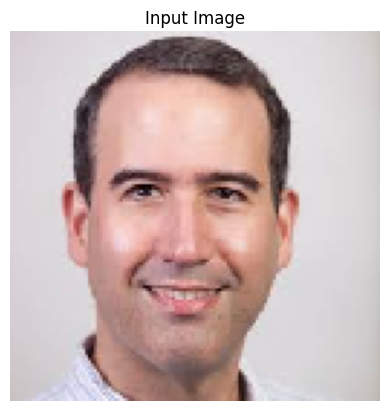

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Not wearing a mask


In [32]:
from tensorflow.keras.preprocessing import image
# Load image
img = image.load_img('/content/download.jfif', target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Plot image
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

# Predict
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Wearing a mask")
else:
    print("Not wearing a mask")

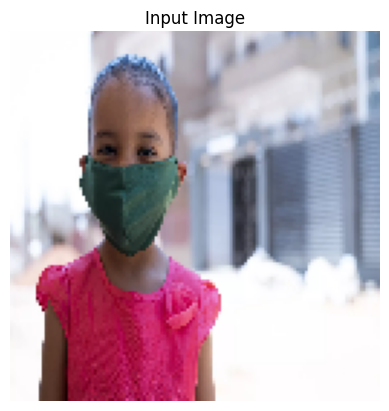

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Wearing a mask


In [33]:
from tensorflow.keras.preprocessing import image
# Load image
img = image.load_img('/content/1920x1080 Banner 2.jpg.jfif', target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Plot image
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

# Predict
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Wearing a mask")
else:
    print("Not wearing a mask")